In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
file_path = 'rspec_runtime_merged_single_line_let_it_be_3.csv'

In [64]:
data = pd.read_csv(file_path, sep=';', decimal=',')
# Display the first few rows of the dataframe for initial analysis
data.head(0)

,filename,Without_let_it_be_secs,With_let_it_be_secs,Diff_secs_without_minus_with,Diff_percentiles,Diff_percentiles_grouped_0_dot_05


In [9]:

# Attempting to load the CSV file with a more flexible approach to handle inconsistent columns
try:
    # Trying to read the file with a different method
    data = pd.read_csv(file_path, error_bad_lines=False)
    data.head()
except Exception as e:
    error_message = str(e)
    error_message


In [61]:
# Attempting to read the file as plain text to understand its structure
with open(file_path, 'r') as file:
    lines = file.readlines()

# Displaying the first few lines to analyze the structure
lines[:1]


['filename;Without_let_it_be_secs;With_let_it_be_secs;Diff_secs_without_minus_with;Diff_percentiles;Diff_percentiles_grouped_0_dot_05\n']

In [63]:
# Reloading the CSV file with the correct delimiter
data = pd.read_csv(file_path, delimiter=';')

# Display the first few rows of the dataframe
data.head(0)

,filename,Without_let_it_be_secs,With_let_it_be_secs,Diff_secs_without_minus_with,Diff_percentiles,Diff_percentiles_grouped_0_dot_05


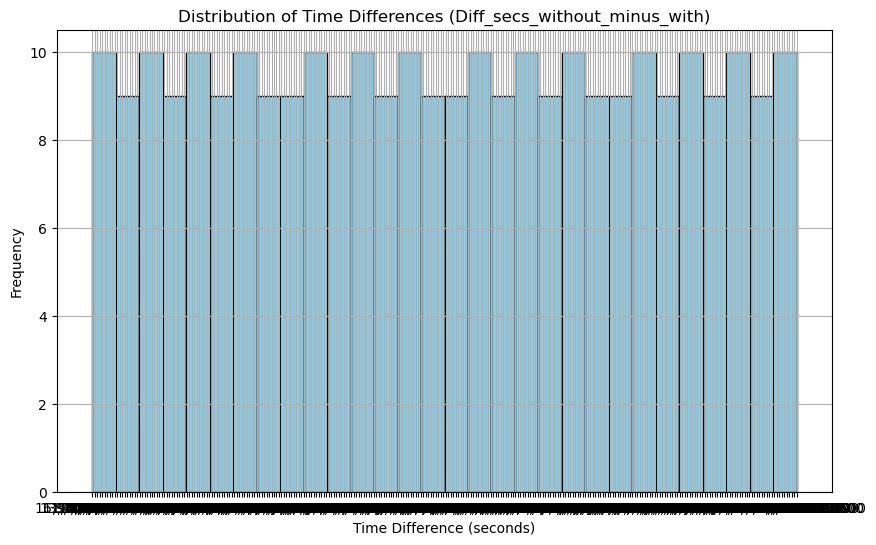

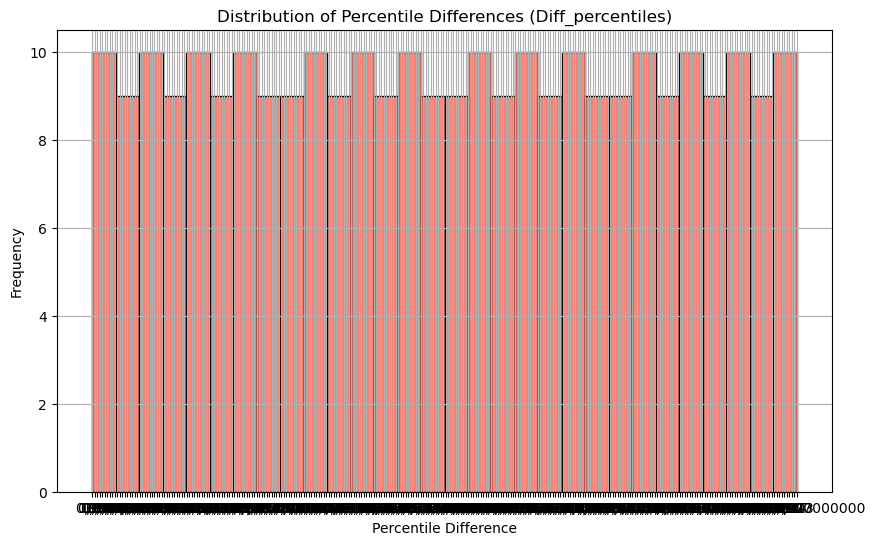

In [12]:
import matplotlib.pyplot as plt

# Creating a histogram to visualize the distribution of time differences
plt.figure(figsize=(10, 6))
plt.hist(data['Diff_secs_without_minus_with'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Time Differences (Diff_secs_without_minus_with)')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Creating a histogram to visualize the distribution of percentile differences
plt.figure(figsize=(10, 6))
plt.hist(data['Diff_percentiles'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Percentile Differences (Diff_percentiles)')
plt.xlabel('Percentile Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

# Function to remove outliers using IQR
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return filtered_df


In [ ]:
# Convert relevant columns to numeric types
data['Diff_secs_without_minus_with'] = data['Diff_secs_without_minus_with'].str.replace(',', '.').astype(float)

In [ ]:
# Convert relevant columns to numeric types
data['Diff_percentiles'] = data['Diff_percentiles'].str.replace(',', '.').astype(float)

In [28]:
# data['Diff_secs_without_minus_with'].quantile(0.99)
# Removing outliers from 'Diff_secs_without_minus_with' and 'Diff_percentiles' columns
data_filtered_time = remove_outliers(data, 'Diff_secs_without_minus_with')
data_filtered_percentiles = remove_outliers(data, 'Diff_percentiles')

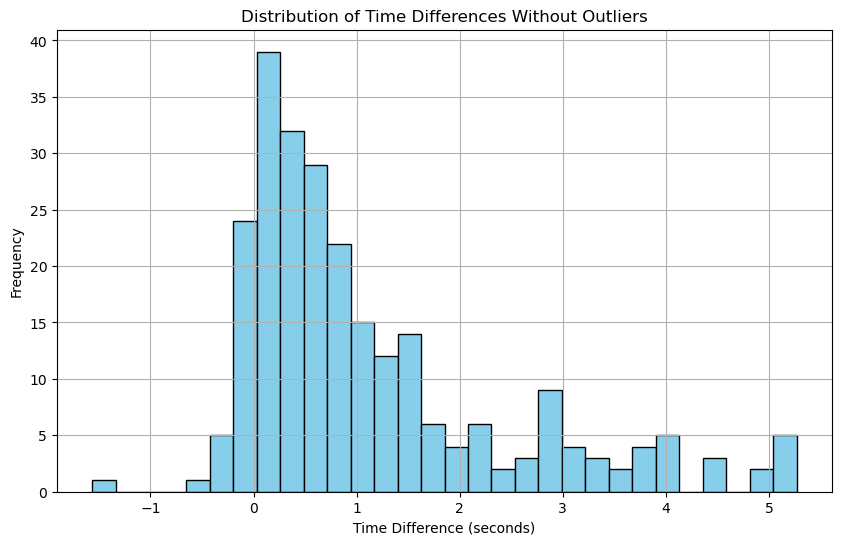

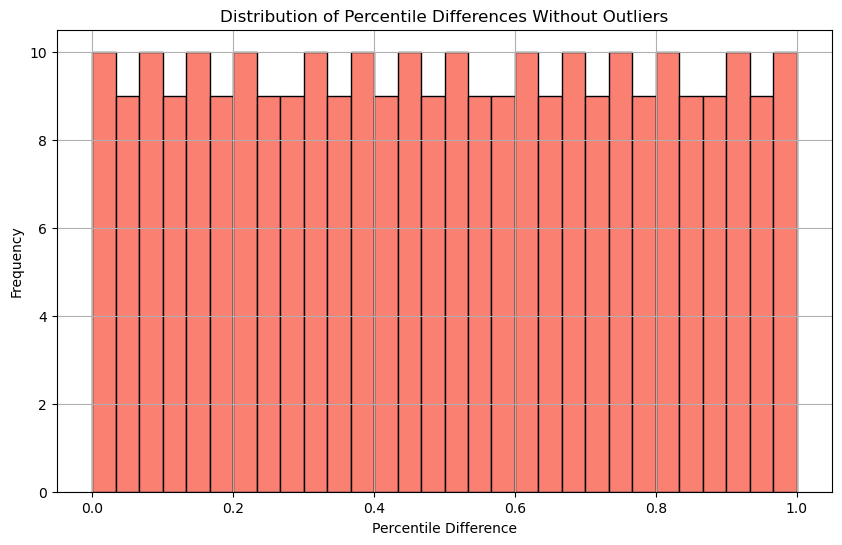

In [29]:
# Creating histograms for the filtered data
plt.figure(figsize=(10, 6))
plt.hist(data_filtered_time['Diff_secs_without_minus_with'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Time Differences Without Outliers')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data_filtered_percentiles['Diff_percentiles'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Percentile Differences Without Outliers')
plt.xlabel('Percentile Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [30]:
# Calculating time advantage metrics for the original and filtered data
def calculate_time_advantages(df):
    total_time_saved = df['Diff_secs_without_minus_with'].sum()
    average_time_saved = df['Diff_secs_without_minus_with'].mean()
    median_time_saved = df['Diff_secs_without_minus_with'].median()
    min_time_saved = df['Diff_secs_without_minus_with'].min()
    max_time_saved = df['Diff_secs_without_minus_with'].max()

    return {
        "total_time_saved": total_time_saved,
        "average_time_saved": average_time_saved,
        "median_time_saved": median_time_saved,
        "range_time_saved": max_time_saved - min_time_saved
    }

In [31]:

advantages_original = calculate_time_advantages(data)
advantages_filtered = calculate_time_advantages(data_filtered_time)

advantages_original, advantages_filtered

({'total_time_saved': 799.4341789997259,
  'average_time_saved': 2.8149090809849504,
  'median_time_saved': 0.7971934999804919,
  'range_time_saved': 123.779461},
 {'total_time_saved': 283.94773699988764,
  'average_time_saved': 1.1267767341265382,
  'median_time_saved': 0.6755285000000966,
  'range_time_saved': 6.833880000000001})

In [35]:
# Replace commas and convert relevant columns to floats
data['Without_let_it_be_secs'] = data['Without_let_it_be_secs'].str.replace(',', '.').astype(float)
data['With_let_it_be_secs'] = data['With_let_it_be_secs'].str.replace(',', '.').astype(float)

# Calculating average durations for both conditions
avg_duration_without = data['Without_let_it_be_secs'].mean()
avg_duration_with = data['With_let_it_be_secs'].mean()

# Data for plotting
conditions = ['Without "let it be"', 'With "let it be"']
avg_durations = [avg_duration_without, avg_duration_with]

<BarContainer object of 2 artists>

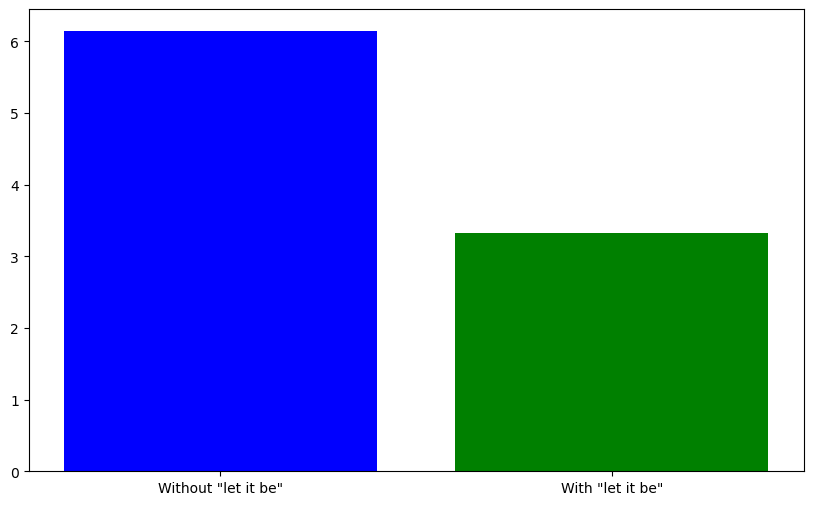

In [36]:
# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(conditions, avg_durations, color=['blue', 'green'])

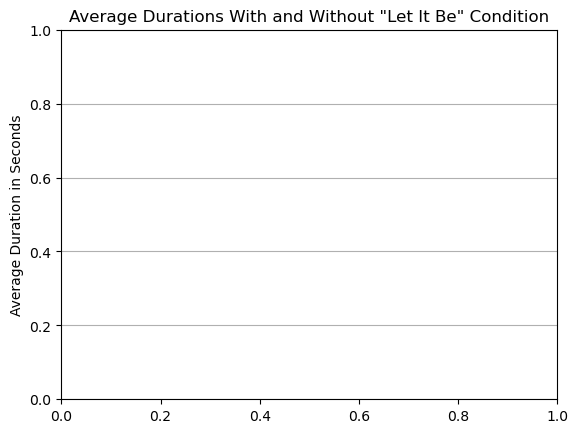

In [37]:
# Adding titles and labels
plt.title('Average Durations With and Without "Let It Be" Condition')
plt.ylabel('Average Duration in Seconds')
plt.grid(axis='y')

In [39]:
# Show the plot
plt.show()

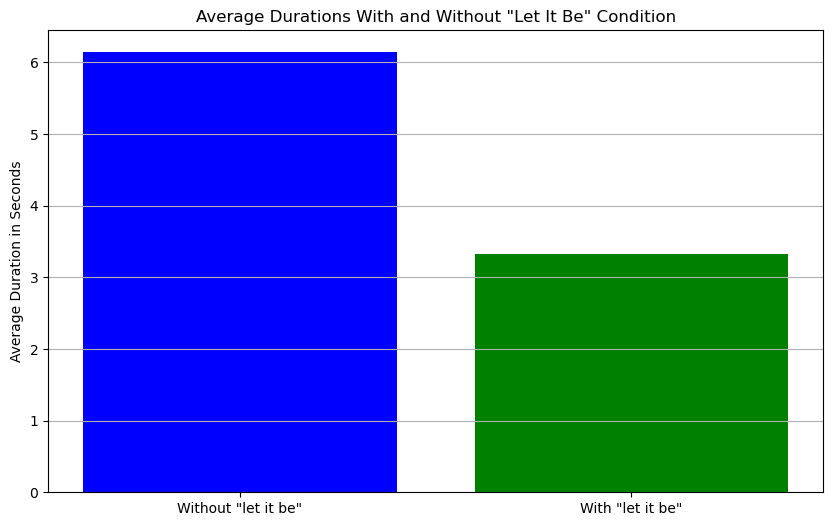

In [40]:
# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(conditions, avg_durations, color=['blue', 'green'])

# Adding titles and labels
plt.title('Average Durations With and Without "Let It Be" Condition')
plt.ylabel('Average Duration in Seconds')
plt.grid(axis='y')

# Show the plot
plt.show();

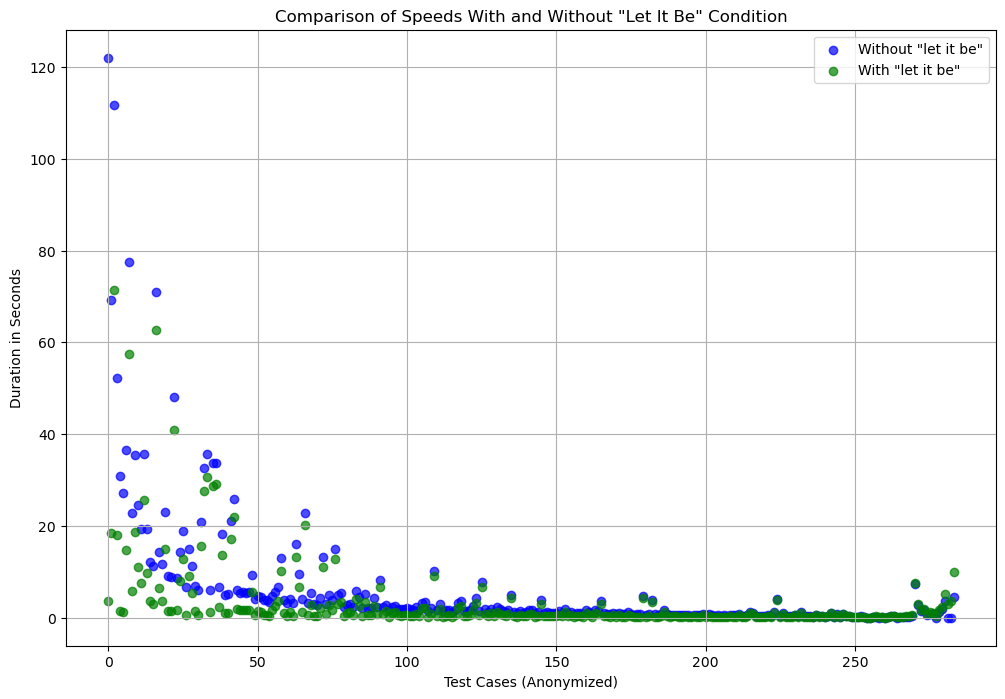

In [41]:
# Creating the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(range(len(data)), data['Without_let_it_be_secs'], color='blue', alpha=0.7, label='Without "let it be"')
plt.scatter(range(len(data)), data['With_let_it_be_secs'], color='green', alpha=0.7, label='With "let it be"')

# Adding titles and labels
plt.title('Comparison of Speeds With and Without "Let It Be" Condition')
plt.ylabel('Duration in Seconds')
plt.xlabel('Test Cases (Anonymized)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


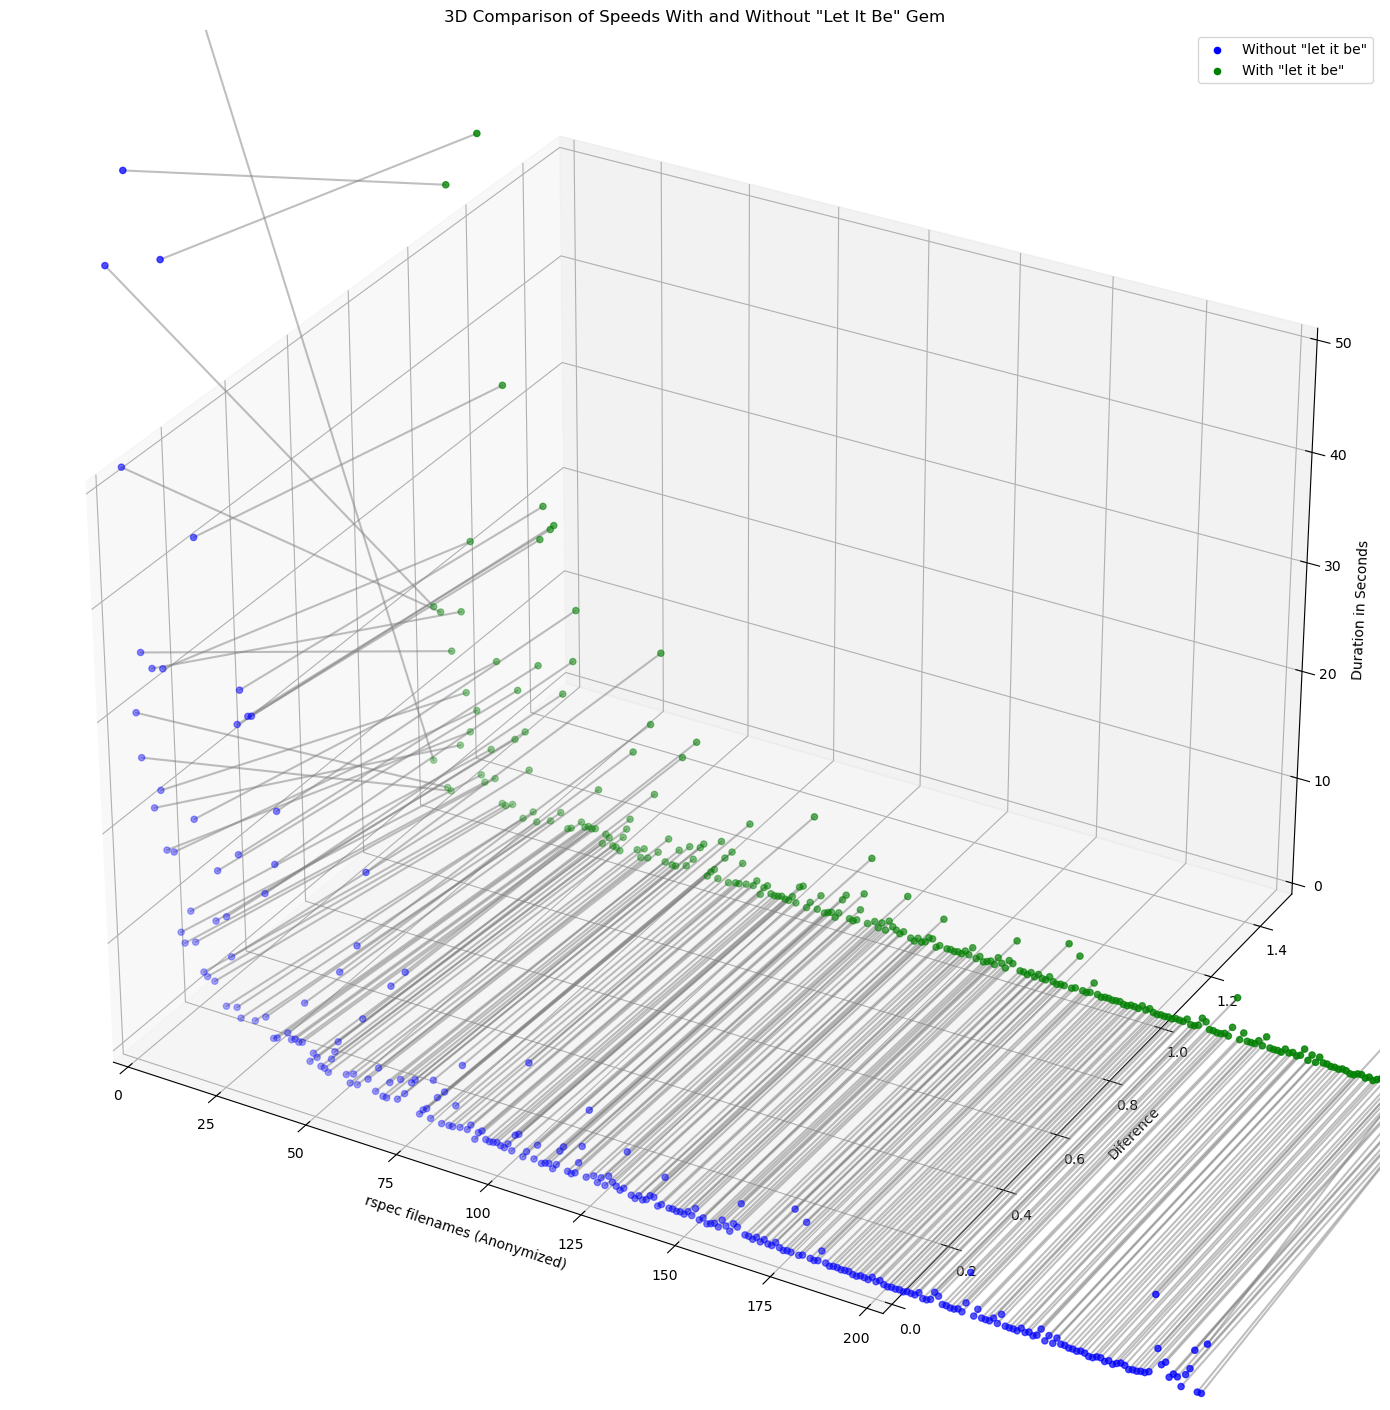

In [73]:
from mpl_toolkits.mplot3d import Axes3D
# conda install Axes3D -y

# Preparing the data for the 3D scatter plot
indices = range(len(data))
without_let_it_be = data['Without_let_it_be_secs']
with_let_it_be = data['With_let_it_be_secs']

# Creating the 3D scatter plot
# fig = plt.figure(figsize=(12, 8))
fig = plt.figure(figsize=(30, 14))  # Increased width
ax = fig.add_subplot(111, projection='3d')

# Scatter points
ax.scatter(indices, without_let_it_be, zs=0, zdir='y', s=20, c='blue', depthshade=True, label='Without "let it be"')
ax.scatter(indices, with_let_it_be, zs=1, zdir='y', s=20, c='green', depthshade=True, label='With "let it be"')

# Connecting lines
for i in indices:
    ax.plot([i, i], [0, 1], [without_let_it_be[i], with_let_it_be[i]], color='gray', alpha=0.5)

# Adjusting the z-axis limit
ax.set_zlim(0, 50)

# Adjusting the  y-axis limit
ax.set_ylim(0, 1.5)


# Adjusting the  y-axis limit
ax.set_xlim(0, 200)

# Adjust layout
plt.tight_layout()

# Setting labels and title
ax.set_xlabel('rspec filenames (Anonymized)')
ax.set_ylabel('Diference')
ax.set_zlabel('Duration in Seconds')
ax.set_title('3D Comparison of Speeds With and Without "Let It Be" Gem')
ax.legend()

# Show the plot
plt.show()


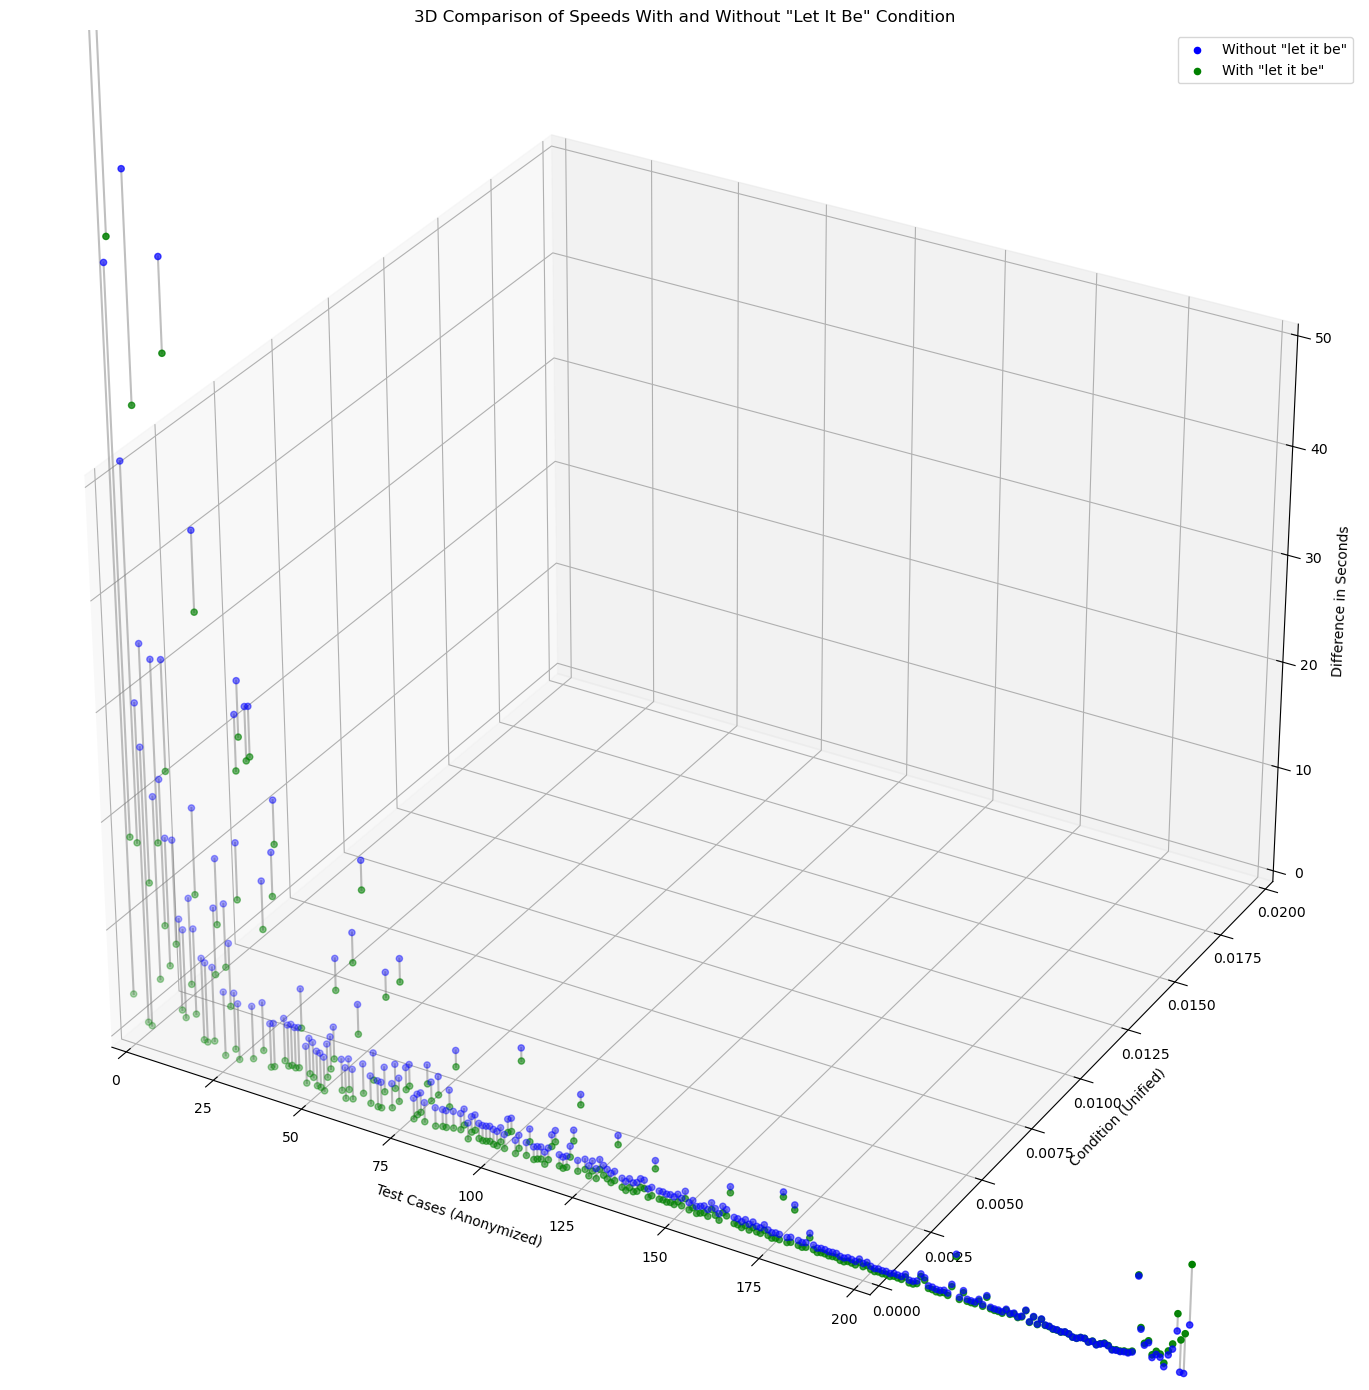

In [87]:
# Creating the 3D scatter plot
# fig = plt.figure(figsize=(12, 8))
fig = plt.figure(figsize=(30, 14))  # Increased width
ax = fig.add_subplot(111, projection='3d')

# Scatter points (using the same y-axis value for both conditions)
y_val = 0  # Same y-axis value for both conditions
ax.scatter(indices, [y_val]*len(data), without_let_it_be, c='blue', depthshade=True, label='Without "let it be"')
ax.scatter(indices, [y_val]*len(data), with_let_it_be, c='green', depthshade=True, label='With "let it be"')

# Connecting lines
for i in indices:
    ax.plot([i, i], [y_val, y_val], [without_let_it_be[i], with_let_it_be[i]], color='gray', alpha=0.5)

# Adjusting the z-axis limit
ax.set_zlim(0, 50)

# Adjusting the  y-axis limit
ax.set_ylim(0, .02)


# Adjusting the  y-axis limit
ax.set_xlim(0, 200)

# Adjust layout
plt.tight_layout()

# Setting labels and title
ax.set_xlabel('Test Cases (Anonymized)')
ax.set_ylabel('Condition (Unified)')
ax.set_zlabel('Difference in Seconds')
ax.set_title('3D Comparison of Speeds With and Without "Let It Be" Condition')
ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [90]:
# hide the red warnings and pink messages and deprecated messages
import warnings
warnings.filterwarnings('ignore')

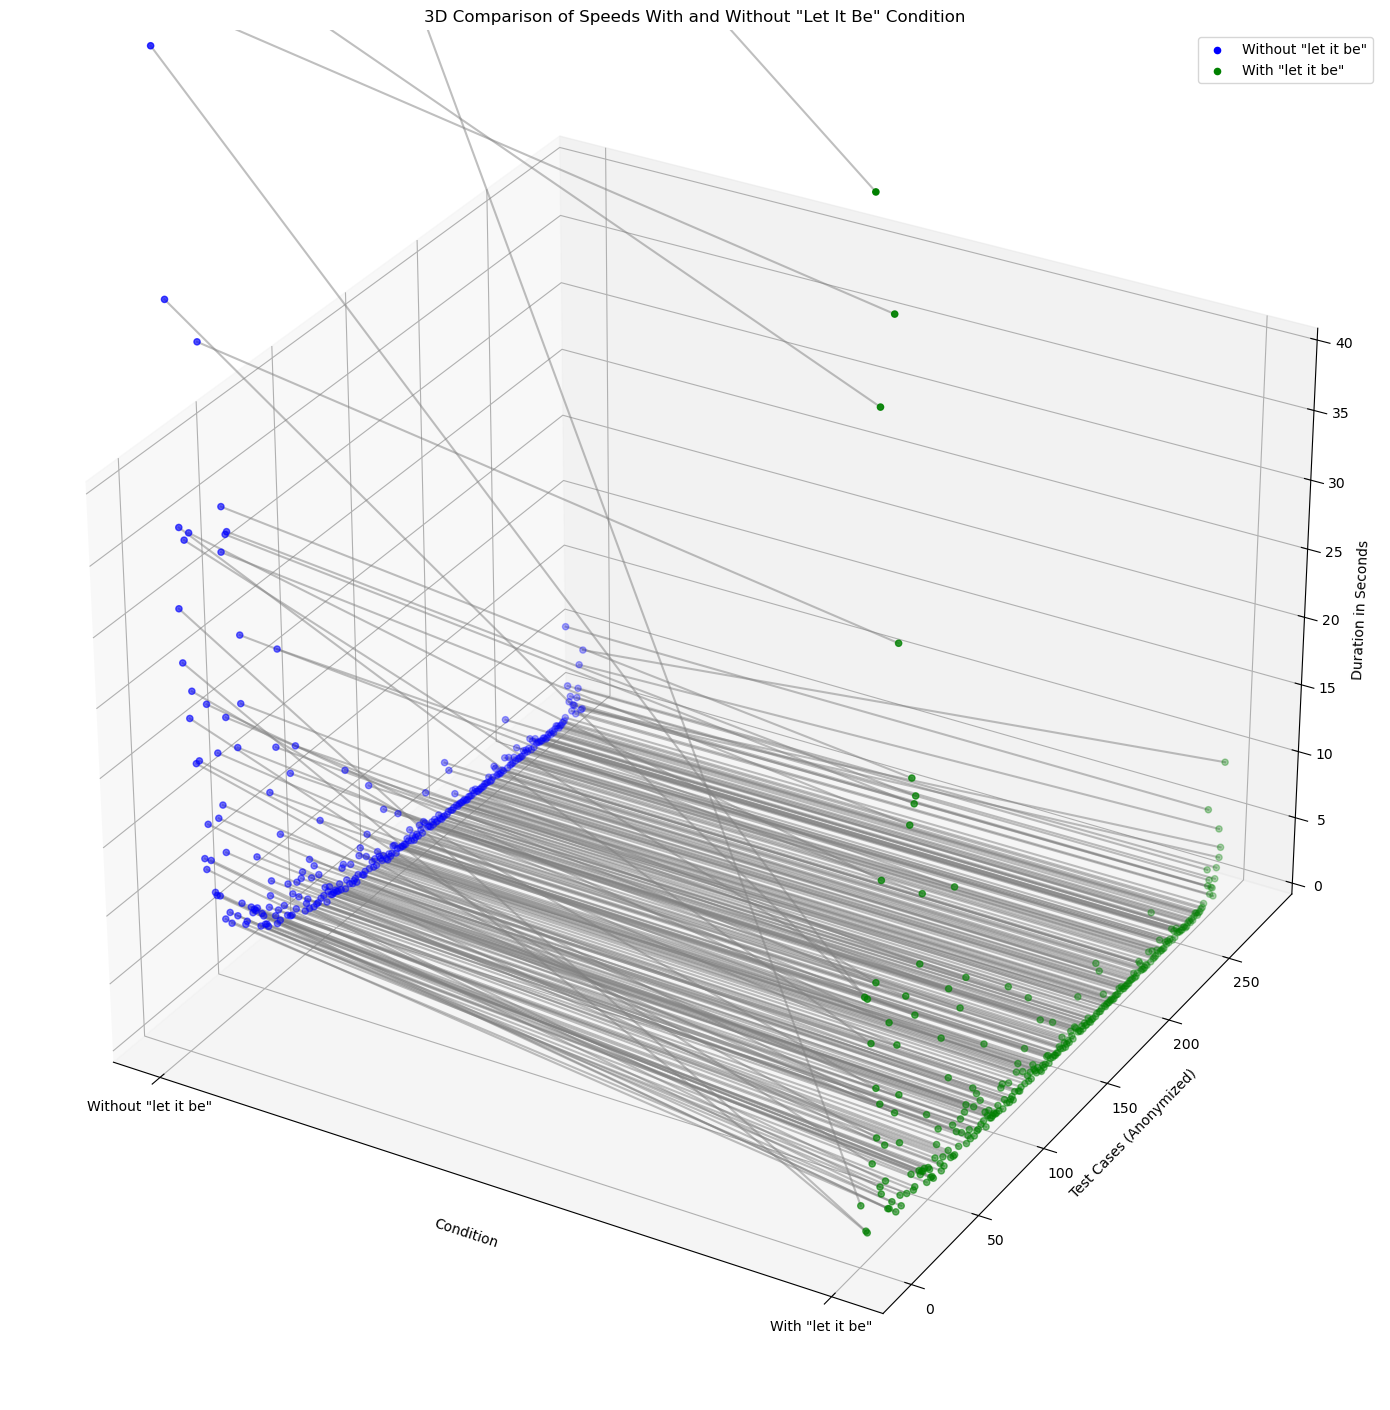

In [107]:
# Conditions represented on the x-axis
x_without = np.zeros(len(data))  # x = 0 for 'Without let it be'
x_with = np.ones(len(data))      # x = 1 for 'With let it be'

# Creating the 3D scatter plot
# fig = plt.figure(figsize=(12, 8))
fig = plt.figure(figsize=(30, 14))  # Increased width
ax = fig.add_subplot(111, projection='3d')

# Scatter points
ax.scatter(x_without, indices, without_let_it_be, c='blue', depthshade=True, label='Without "let it be"')
ax.scatter(x_with, indices, with_let_it_be, c='green', depthshade=True, label='With "let it be"')

# Connecting lines
for i in range(len(data)):
    ax.plot([0, 1], [i, i], [without_let_it_be[i], with_let_it_be[i]], color='gray', alpha=0.5)

# Adjusting the z-axis limit
ax.set_zlim(0, 40)

# Adjust layout
plt.tight_layout()

# Setting labels and title
ax.set_xlabel('Condition')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Without "let it be"', 'With "let it be"'])
ax.set_ylabel('Test Cases (Anonymized)')
ax.set_zlabel('Duration in Seconds')
ax.set_title('3D Comparison of Speeds With and Without "Let It Be" Condition')
ax.legend()



# Show the plot
plt.show();


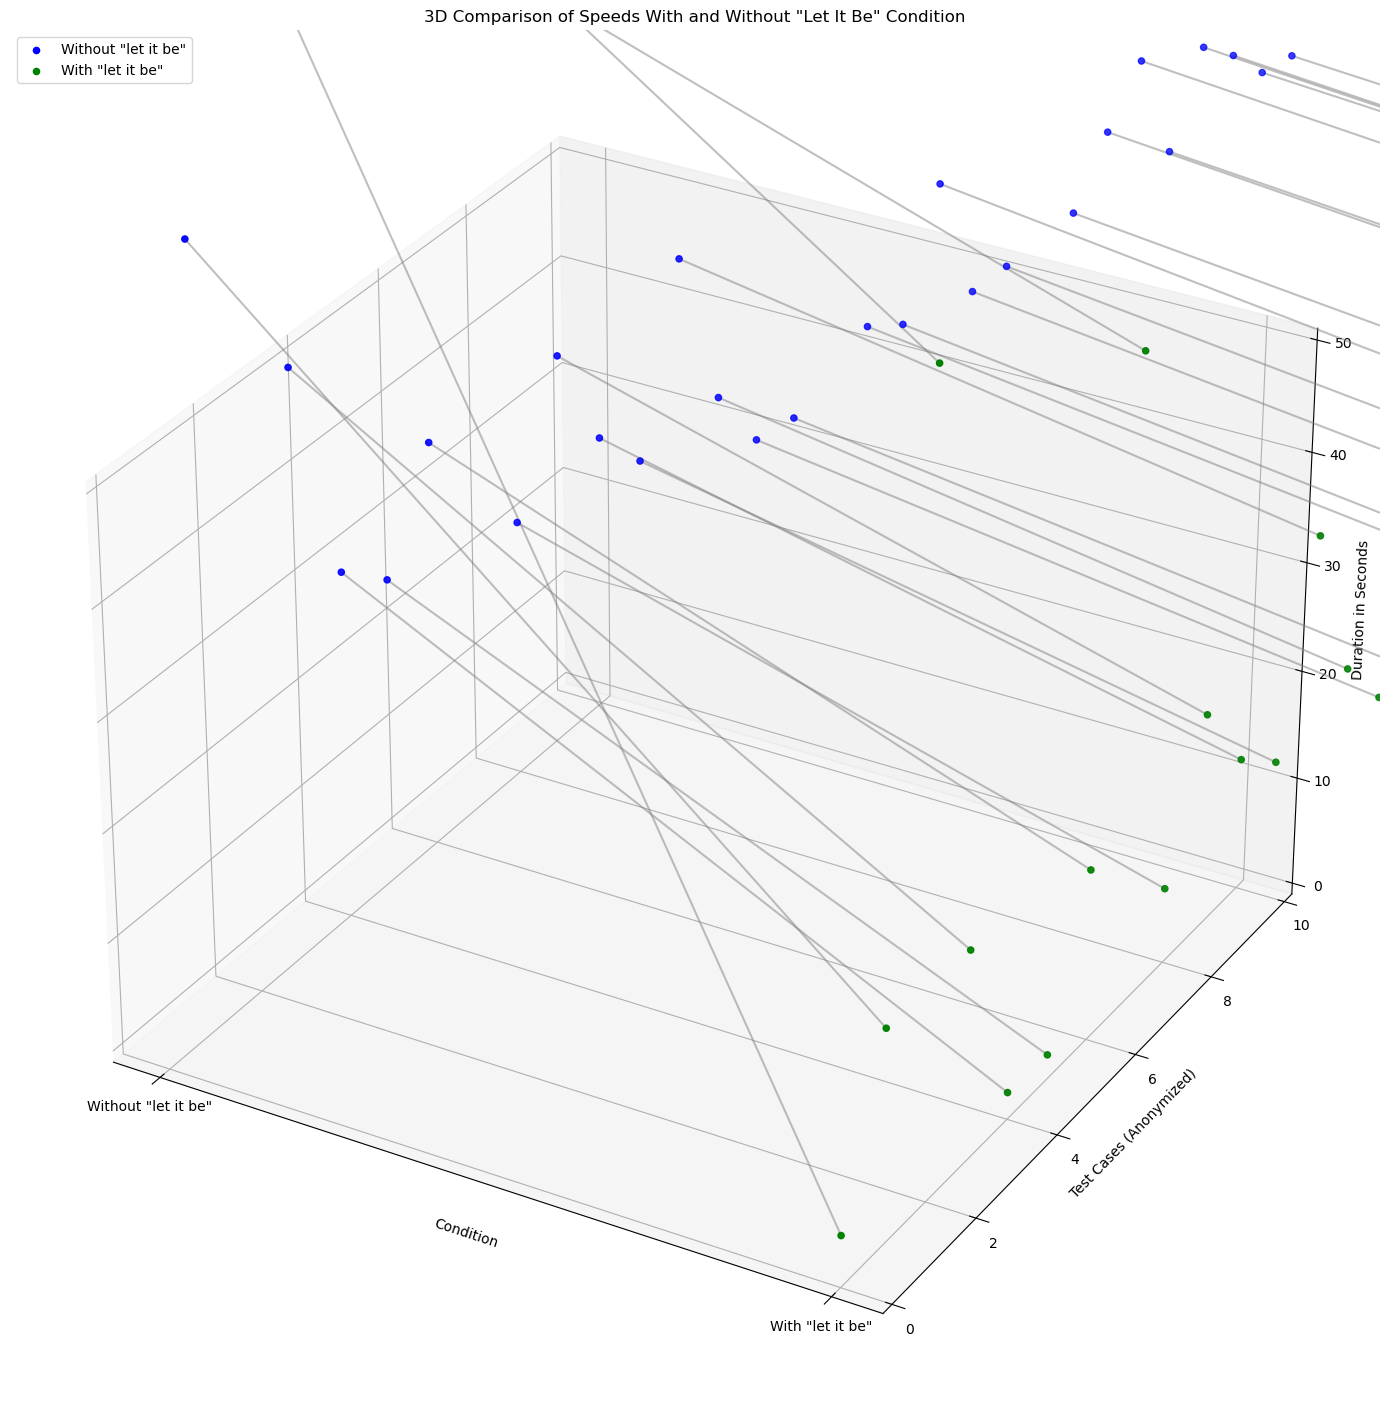

In [105]:

# Conditions represented on the x-axis
x_without = np.zeros(len(data))  # x = 0 for 'Without let it be'
x_with = np.ones(len(data))      # x = 1 for 'With let it be'

# Creating the 3D scatter plot
# fig = plt.figure(figsize=(12, 8))
fig = plt.figure(figsize=(30, 14))  # Increased width
ax = fig.add_subplot(111, projection='3d')

# Scatter points
ax.scatter(x_without, indices, without_let_it_be, c='blue', depthshade=True, label='Without "let it be"')
ax.scatter(x_with, indices, with_let_it_be, c='green', depthshade=True, label='With "let it be"')

# Connecting lines
for i in range(len(data)):
    ax.plot([0, 1], [i, i], [without_let_it_be[i], with_let_it_be[i]], color='gray', alpha=0.5)

# Adjusting the z-axis limit
ax.set_zlim(0, 40)

# Adjusting the z-axis limit
ax.set_zlim(0, 50)

# # Adjusting the  y-axis limit
ax.set_ylim(0, 10)


# # Adjusting the  y-axis limit
# ax.set_xlim(0, 200)

# Adjust layout
plt.tight_layout()

# Setting labels and title
ax.set_xlabel('Condition')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Without "let it be"', 'With "let it be"'])
ax.set_ylabel('Test Cases (Anonymized)')
ax.set_zlabel('Duration in Seconds')
ax.set_title('3D Comparison of Speeds With and Without "Let It Be" Condition')
ax.legend();


# Show the plot
plt.show();

Conclusion:

The time advantages associated with the "let it be" condition are as follows:

# Original Data (Including Outliers)

    Total Time Saved: Approximately 799.43 seconds across all test cases.
    Average Time Saved: On average, each test case saved about 2.81 seconds.
    Median Time Saved: The median time saved is about 0.80 seconds.
    Range of Time Saved: The range of time saved across all test cases is about 123.78 seconds (from the smallest to the largest value).

# Data with Outliers Removed

    Total Time Saved: Approximately 283.95 seconds across all filtered test cases.
    Average Time Saved: On average, each test case saved about 1.13 seconds.
    Median Time Saved: The median time saved is about 0.68 seconds.
    Range of Time Saved: The range of time saved across filtered test cases is about 6.83 seconds.

# Interpretation

- The total and average time saved are notably higher when including outliers, indicating that a few test cases have significantly larger time savings compared to the majority.
- After removing outliers, the average and median time savings decrease, suggesting that the typical ***time benefit of the "let it be" condition is more modest than what the outliers imply.***
- The wide range in the original data highlights the presence of a few cases with exceptionally high time savings, which are not representative of the general trend.

## From 6 to 10 secs (more or less) of benefit, but with the danger of creating lots of "flakky tests"